# Import modules:

In [1]:
import sys, os
sys.path.append(os.path.realpath("aima"))
%matplotlib inline

import csp_TUMsubclass as csp

# Arc Consistency Algorithm

Let us have a look at pseudocode and implementation, which you can find at slide 34.
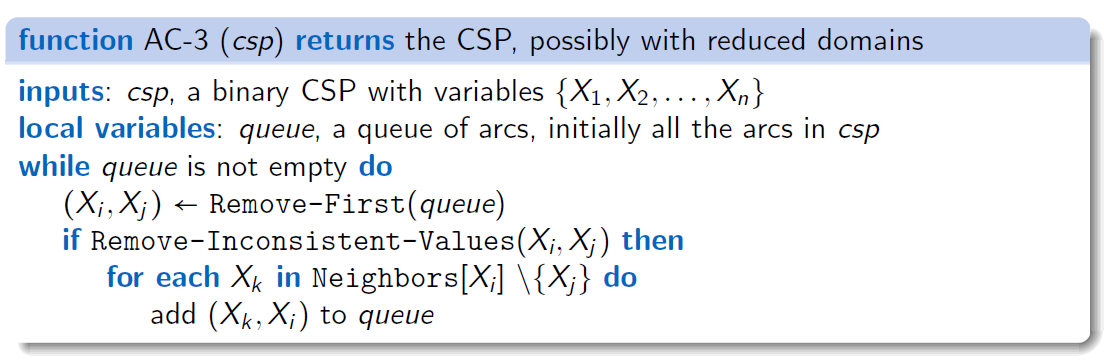

Note that the function csp.make_arc_consistent invoked in csp.AC3 performs the while loop described in the pseudo code.

In [2]:
psource csp.AC3

In [3]:
psource csp.make_arc_consistent 

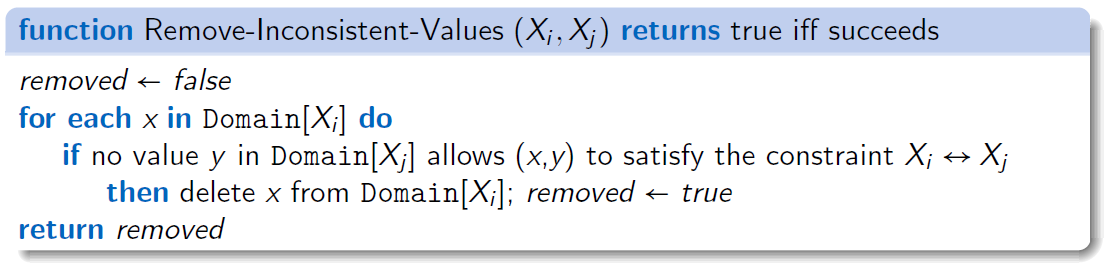

(in our slides remove-inconsistent-values is called revise in the aima code)

In [4]:
psource csp.AIMAcsp.revise

## AC-3 and backtracking search

When we perform the AC-3 algorithm during backtracking search, the algorithm is called after a value x has been assigned to a variable X. In this case, the queue in the algorithm does not contain all arcs of the CSP, but just the arcs ($Y_{i}, X$) where each $Y_{i}$ is a neighbor of the variable X.

# Arc Consistency (see slide 30)

Let us instantiate a Map Coloring Australia CSP, which was already mentioned in the lecture. Note that we omit Tanzania in the CSP.

In [5]:
my_australia = csp.australia() #create a new Australia CSP
my_australia.support_pruning() #initialize domains
assignment = {}                #the assignment is empty since we did not initialize any variable

Consider the following start situation:
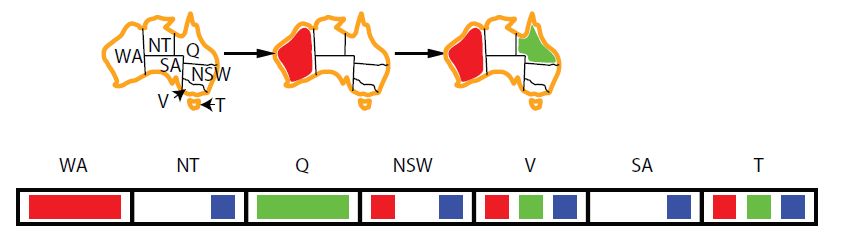
The following lines will assign values and domains to the variables according to the picture.

In [6]:
my_australia.assign( 'WA', 'R', assignment) #assign Red to WA
my_australia.curr_domains['WA'] = ['R']     #set domain of WA to R
my_australia.prune('NT', 'R', None)         #remove Red from domain of NT
my_australia.prune('SA', 'R', None)         #remove Red from domain of SA
my_australia.assign( 'Q', 'G', assignment)  #assign Green to Q
my_australia.curr_domains['Q'] = ['G']      #set domain of Q to Green
my_australia.prune('NT', 'G', None)         #remove Green from domain of NT
my_australia.prune('SA', 'G', None)         #remove Green from domain of SA
my_australia.prune('NSW', 'G', None)        #remove Green from domain of NSW

Value R assigned to variable WA
Value G assigned to variable Q


We can verify the state of our CSP by displaying assignments and domains:

In [7]:
my_australia.display(assignment)
my_australia.display_domain()

CSP: <csp_TUMsubclass.TUMCSP object at 0x7f1c03cdef90> with assignment: {'WA': 'R', 'Q': 'G'}
variable: SA with domain: ['B']
variable: WA with domain: ['R']
variable: NT with domain: ['B']
variable: Q with domain: ['G']
variable: NSW with domain: ['R', 'B']
variable: V with domain: ['R', 'G', 'B']


Let us start our example from here: we just removed green from the domain of NSW (e.g. due to forward checking after assigning green to Q), so we start the AC-3 algorithm from NSW. We first check if NSW (variable Xi) is arc-consistent with SA (variable Xj).
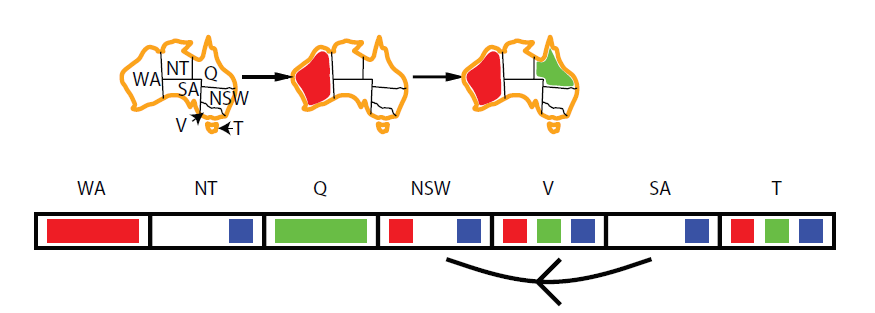

In [8]:
queue = [('NSW', 'SA') ]
csp.make_arc_consistent(my_australia, queue)

Checking if NSW is arc-consistent with SA
NSW was not consistent with SA. Domain of NSW is now: R
Added to queue (Q, NSW)
Added to queue (V, NSW)


In [9]:
queue

[('Q', 'NSW'), ('V', 'NSW')]

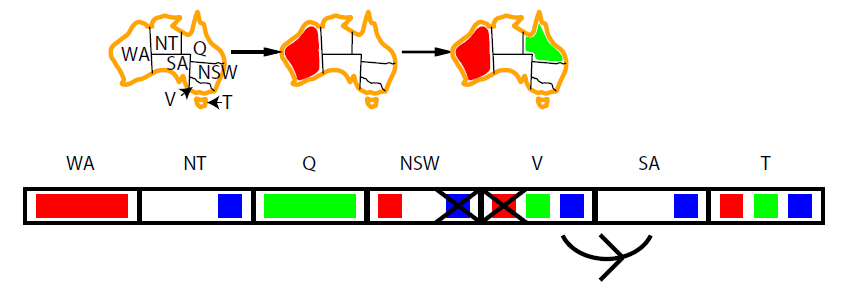
To make NSW arc-consistent with SA, we had to remove blue. Due to the
removal we have to check arc-consistency of the neighbors of NSW (except SA) with NSW, for this reason we added the corresponding arcs to the queue.

In [10]:
csp.make_arc_consistent(my_australia, queue)
csp.make_arc_consistent(my_australia, queue)

Checking if Q is arc-consistent with NSW
Q is already arc-consistent with NSW
Checking if V is arc-consistent with NSW
V was not consistent with NSW. Domain of V is now: GB
Added to queue (SA, V)


In [11]:
queue

[('SA', 'V')]

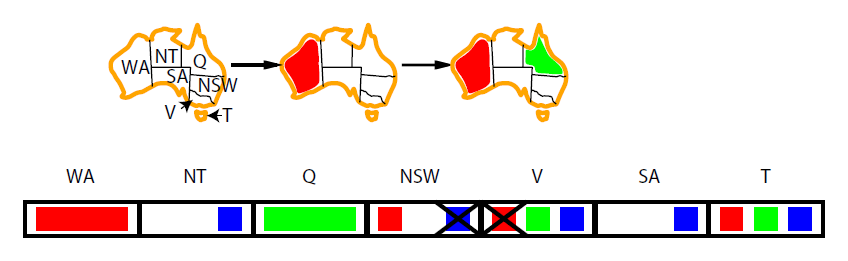
Q was arc-consistent with NSW, but we had to remove red from V. Due
to the removal we have to check arc-consistency of the neighbors of V (except NSW) with V, for this reason we added the corresponding arcs to the queue.

In [12]:
csp.make_arc_consistent(my_australia, queue)

Checking if SA is arc-consistent with V
SA is already arc-consistent with V


Since SA is arc-consistent with V, the algorithm terminates. 

## Review of arc- consistency

The situation, where our AC-3 algorithm just ended, offers us a great opportunity to review the concept of arc-consistency.
Consider the following situation:
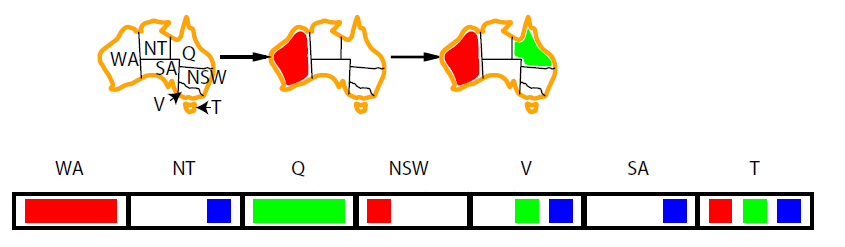
As shown previously, SA is arc-consistent with V. 
However, V is not arc-consistent with SA. V would be arc-consistent with SA after removing blue from its domain.

This is a good example to understand that every arc has a direction. The same arc can be arc-consistent in one direction (SA is arc-consistent with V) and not arc-consistent in the other (V is not arc-consistent with SA).

## Notes on arc consistency for this example

Note that in the above example during backtracking search, the AC-3 algorithm was invoked with a specific arc as initial queue. After the AC-3 algorithm terminated, the CSP was not arc consistent.

Applying the AC-3 algorithm during backtracking search after assigning a value to a variable, the resulting CSP will always be arc-consistent if it has a solution. This is shown in the next example




# Arc Consistency Algorithm: Example (see slide 31)

Let us apply the Arc Consistency Algorithm to the Australia CSP after the first assignment. 

In [13]:
my_australia = csp.australia() #create a new Australia CSP
my_australia.support_pruning() #initialize domains
assignment = {}                #the assignment is empty since we did not initialize any variable

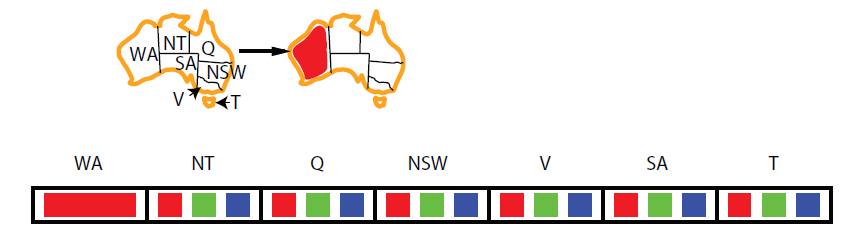
We set WA = red. In order to check arc-consistency of the neighbours of WA with WA, we add the corresponding arcs to the queue.

In [14]:
my_australia.assign( 'WA', 'R', assignment) #assign Red to WA
my_australia.curr_domains['WA'] = ['R']     #set domain of WA to R
queue = [('NT', 'WA'), ('SA', 'WA')]        #check arc-consistency of the neighbours of WA 

Value R assigned to variable WA


We check if the first arc in the queue is arc-consistency.

In [15]:
print(queue[0])  #take a look at the first element of the queue
csp.make_arc_consistent(my_australia, queue)

('NT', 'WA')
Checking if NT is arc-consistent with WA
NT was not consistent with WA. Domain of NT is now: GB
Added to queue (SA, NT)
Added to queue (Q, NT)


In [16]:
queue

[('SA', 'WA'), ('SA', 'NT'), ('Q', 'NT')]

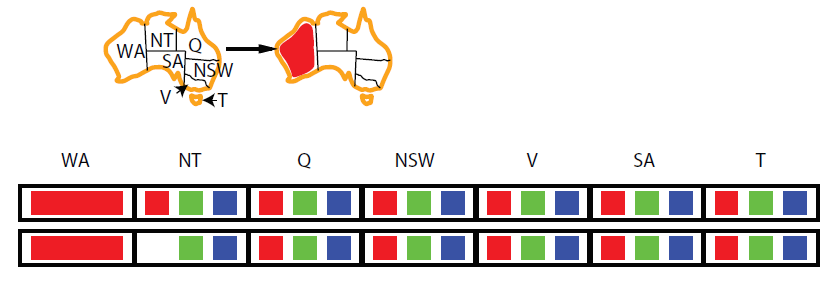
Red was removed from the domain of NT. We have to check arc-consistency of the neighbours of NT (except WA) with NT. For this reason, we added the arcs (SA, NT) and (Q, NT) to the queue.

In [17]:
print(queue[0])                                    #take a look at the first element of the queue
csp.make_arc_consistent(my_australia, queue)

('SA', 'WA')
Checking if SA is arc-consistent with WA
SA was not consistent with WA. Domain of SA is now: GB
Added to queue (NT, SA)
Added to queue (Q, SA)
Added to queue (NSW, SA)
Added to queue (V, SA)


In [18]:
queue

[('SA', 'NT'),
 ('Q', 'NT'),
 ('NT', 'SA'),
 ('Q', 'SA'),
 ('NSW', 'SA'),
 ('V', 'SA')]

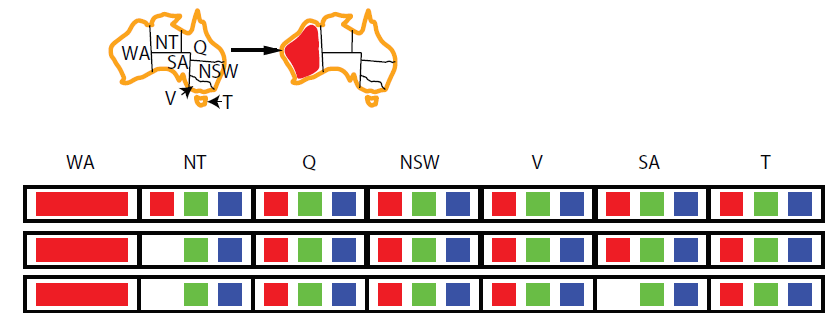
Red was removed from the domain of SA. We have to check arc-consistency of the neighbours of SA (except WA) with SA, for this reason we added the arcs (NT, SA), (Q, SA), (NSW, SA) and (V, SA) to the queue.

In [19]:
csp.make_arc_consistent(my_australia, queue)

Checking if SA is arc-consistent with NT
SA is already arc-consistent with NT


In [20]:
queue

[('Q', 'NT'), ('NT', 'SA'), ('Q', 'SA'), ('NSW', 'SA'), ('V', 'SA')]

The first arc in the queue is already arc-consistent, as well as the other arcs. Therefore, the algorithm terminates.

In [21]:
while(queue):
    csp.make_arc_consistent(my_australia, queue)

Checking if Q is arc-consistent with NT
Q is already arc-consistent with NT
Checking if NT is arc-consistent with SA
NT is already arc-consistent with SA
Checking if Q is arc-consistent with SA
Q is already arc-consistent with SA
Checking if NSW is arc-consistent with SA
NSW is already arc-consistent with SA
Checking if V is arc-consistent with SA
V is already arc-consistent with SA


In [22]:
queue

[]

# The AC3 function

Note that in the previous example, we perfomed the internal steps of the AC-3 algorithm separately, but the function AC3 will perform them all automatically. 

Let us perform the same example as before with the function AC3.

In [23]:
my_australia = csp.australia()          #create a new Australia CSP
my_australia.support_pruning()          #initialize domains

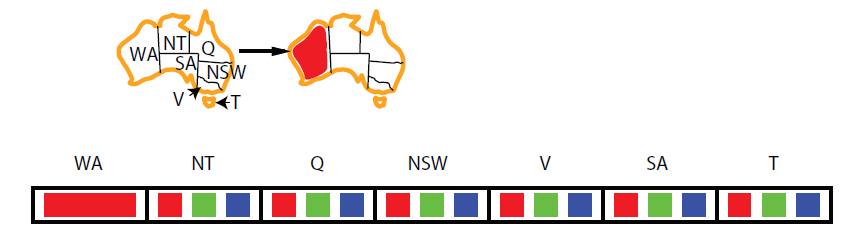
We set WA = red. In order to check arc-consistency of the neighbours of WA with WA, we add the corresponding arcs to the queue.

In [24]:
my_australia.curr_domains['WA'] = ['R'] #assign red to WA
queue = [('NT', 'WA'), ('SA', 'WA')]    #check arc-consistency of the neighbours of WA

Perform AC-3 with the AC3 function:

In [25]:
csp.AC3(my_australia, queue)            #returns True iff my_australia is arc-consistent, otherwise False

Checking if NT is arc-consistent with WA
NT was not consistent with WA. Domain of NT is now: GB
Added to queue (SA, NT)
Added to queue (Q, NT)
Checking if SA is arc-consistent with WA
SA was not consistent with WA. Domain of SA is now: GB
Added to queue (NT, SA)
Added to queue (Q, SA)
Added to queue (NSW, SA)
Added to queue (V, SA)
Checking if SA is arc-consistent with NT
SA is already arc-consistent with NT
Checking if Q is arc-consistent with NT
Q is already arc-consistent with NT
Checking if NT is arc-consistent with SA
NT is already arc-consistent with SA
Checking if Q is arc-consistent with SA
Q is already arc-consistent with SA
Checking if NSW is arc-consistent with SA
NSW is already arc-consistent with SA
Checking if V is arc-consistent with SA
V is already arc-consistent with SA


True